In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv


In [2]:
#CSV file paths

accident_path = "project_data/accident_df.csv"
main_csv_path = "project_data/proj_accident_main.csv"


#creating dataframes 
main_df = pd.read_csv(main_csv_path)
accident_df = pd.read_csv(accident_path)


#remove first column
main_df = main_df.drop(main_df.columns[0], axis=1)
accident_df = accident_df.drop(accident_df.columns[0], axis=1)




In [25]:
main_accident_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_df["ACCIDENT_NO"])]

#converting accidentdate column to datetime format, for easier search
main_df["ACCIDENTDATE"] = pd.to_datetime(main_df["ACCIDENTDATE"])
main_accident_df["ACCIDENTDATE"] = pd.to_datetime(main_accident_df["ACCIDENTDATE"])
#main_df["Year"] = main_df["ACCIDENTDATE"].dt.year

#creating dataframes for each year's accidents
main_2016_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2016]
main_2017_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2017]
main_2018_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2018]
main_2019_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2019]
main_2020_df = main_df[main_df["ACCIDENTDATE"].dt.year == 2020]


# accident  dataframes based on year
accident_2016_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2016_df["ACCIDENT_NO"])]
accident_2017_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2017_df["ACCIDENT_NO"])]
accident_2018_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2018_df["ACCIDENT_NO"])]
accident_2019_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2019_df["ACCIDENT_NO"])]
accident_2020_df = accident_df[accident_df["ACCIDENT_NO"].isin(main_2020_df["ACCIDENT_NO"])]


accident_2020_df


,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE,SEVERITY_DESC
15939,T20200000016,2020-01-01,00:30:00,4,Collision with a fixed object,4,Wednesday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHIC...,MEL,...,1,0,0,2,1,2,T intersection,2,50,Serious injury accident
15940,T20200000047,2020-01-01,13:47:00,4,Collision with a fixed object,4,Wednesday,175,OFF END OF ROAD/T-INTERSECTION.,MEL,...,1,0,0,0,1,2,T intersection,2,50,Serious injury accident
15941,T20200000054,2020-01-01,13:00:00,1,Collision with vehicle,4,Wednesday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,1,0,0,3,1,5,Not at intersection,2,100,Serious injury accident
15942,T20200000056,2020-01-01,15:10:00,4,Collision with a fixed object,4,Wednesday,181,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE ...,VCD,...,1,0,0,0,1,5,Not at intersection,2,100,Serious injury accident
15943,T20200000084,2020-01-02,08:20:00,1,Collision with vehicle,5,Thursday,152,PULLING OUT (OVERTAKING),MEL,...,1,0,0,2,1,2,T intersection,2,80,Serious injury accident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62259,T20200017372,2020-09-30,06:49:00,4,Collision with a fixed object,4,Wednesday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHIC...,MEL,...,0,0,1,0,1,5,Not at intersection,1,80,Fatal accident
62260,T20200018096,2020-10-14,00:15:00,4,Collision with a fixed object,4,Wednesday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE ...,VCD,...,0,0,1,0,1,5,Not at intersection,1,100,Fatal accident
62261,T20200018319,2020-10-17,17:19:00,4,Collision with a fixed object,7,Saturday,173,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHIC...,MEL,...,0,0,1,0,1,5,Not at intersection,1,100,Fatal accident
62262,T20200018424,2020-10-19,16:22:00,1,Collision with vehicle,2,Monday,119,OTHER ADJACENT (INTERSECTIONS ONLY),MEL,...,0,1,1,0,1,2,T intersection,1,100,Fatal accident


# selecting the relevant columns


In [26]:

accident_2016_df = accident_2016_df[["ACCIDENT_NO","ACCIDENTDATE","NO_PERSONS"]]
accident_2017_df = accident_2017_df[["ACCIDENT_NO","ACCIDENTDATE","NO_PERSONS"]]
accident_2018_df = accident_2018_df[["ACCIDENT_NO","ACCIDENTDATE","NO_PERSONS"]]
accident_2019_df = accident_2019_df[["ACCIDENT_NO","ACCIDENTDATE","NO_PERSONS"]]
accident_2020_df = accident_2020_df[["ACCIDENT_NO","ACCIDENTDATE","NO_PERSONS"]]

main_accident_df = main_accident_df[["ACCIDENT_NO","ACCIDENTDATE","NO_PERSONS","NO_PERSONS_KILLED","NO_PERSONS_NOT_INJ"]]


In [107]:
main_accident_df

,ACCIDENT_NO,ACCIDENTDATE,NO_PERSONS,NO_PERSONS_KILLED
0,T20160000013,2016-01-01,2,0
1,T20160000015,2016-01-01,1,0
2,T20160000019,2016-01-01,1,0
3,T20160000028,2016-01-01,2,0
4,T20160000031,2016-01-01,2,0
...,...,...,...,...
62261,T20200019239,2020-11-01,4,0
62262,T20200019247,2020-11-01,2,0
62263,T20200019250,2020-11-01,2,0
62264,T20200019253,2020-11-01,1,0


# number of accidents per year
2016-2019

In [29]:
#creating summary table

sum_df_years = pd.DataFrame()
sum_df_years["Number_of_accidents"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["ACCIDENT_NO"].count()
#sum_df_years = sum_df_years.drop(sum_df_years.index[-1]) #drop last row (2020)
#sum_df_years["Number_of_accidents"][2016]
sum_df_years["Persons"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS"].sum()
sum_df_years["Deaths"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS_KILLED"].sum()
sum_df_years["Not_injured"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS_NOT_INJ"].sum()
sum_df_years["Injured"] = sum_df_years["Persons"] - (sum_df_years["Deaths"] + sum_df_years["Not_injured"])
sum_df_years["mean_people_injured"] = sum_df_years["Injured"] / sum_df_years["Number_of_accidents"]
sum_df_years["mean_people_death"] = main_accident_df.groupby(main_accident_df["ACCIDENTDATE"].dt.year, as_index=True)["NO_PERSONS_KILLED"].mean()

sum_df_years


,Number_of_accidents,Persons,Deaths,Not_injured,Injured,mean_people_injured,mean_people_death
ACCIDENTDATE,,,,,,,
2016,15852,37629,290,17738,19601,1.236500,0.018294
2017,13393,32329,259,15293,16777,1.252669,0.019338
2018,12797,30810,211,14668,15931,1.244901,0.016488
2019,14164,34056,263,15975,17818,1.257978,0.018568
2020,6060,13589,150,6026,7413,1.223267,0.024752


# number of accidents per year


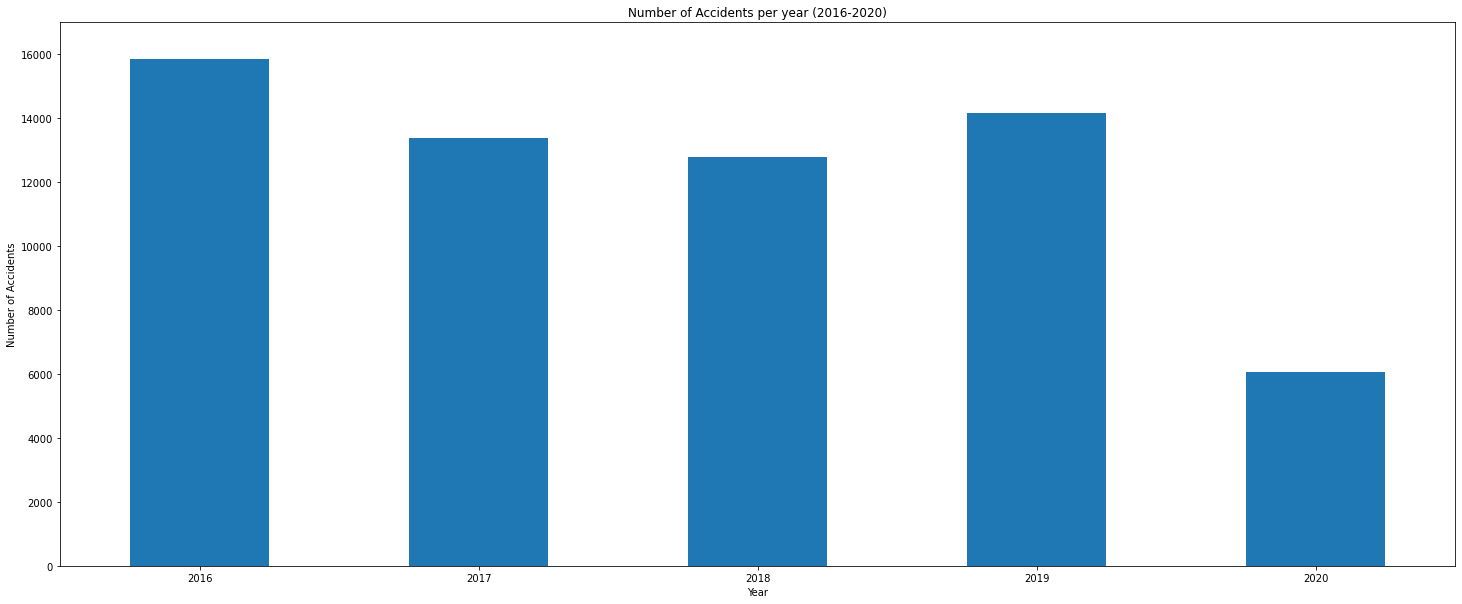

In [18]:
plt.figure(figsize=(25, 10))
sum_df_years["Number_of_accidents"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of Accidents per year (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

plt.ylim(0,17000)
plt.savefig("project_output/accidents_per_year.png")


# people injured 
# people killed


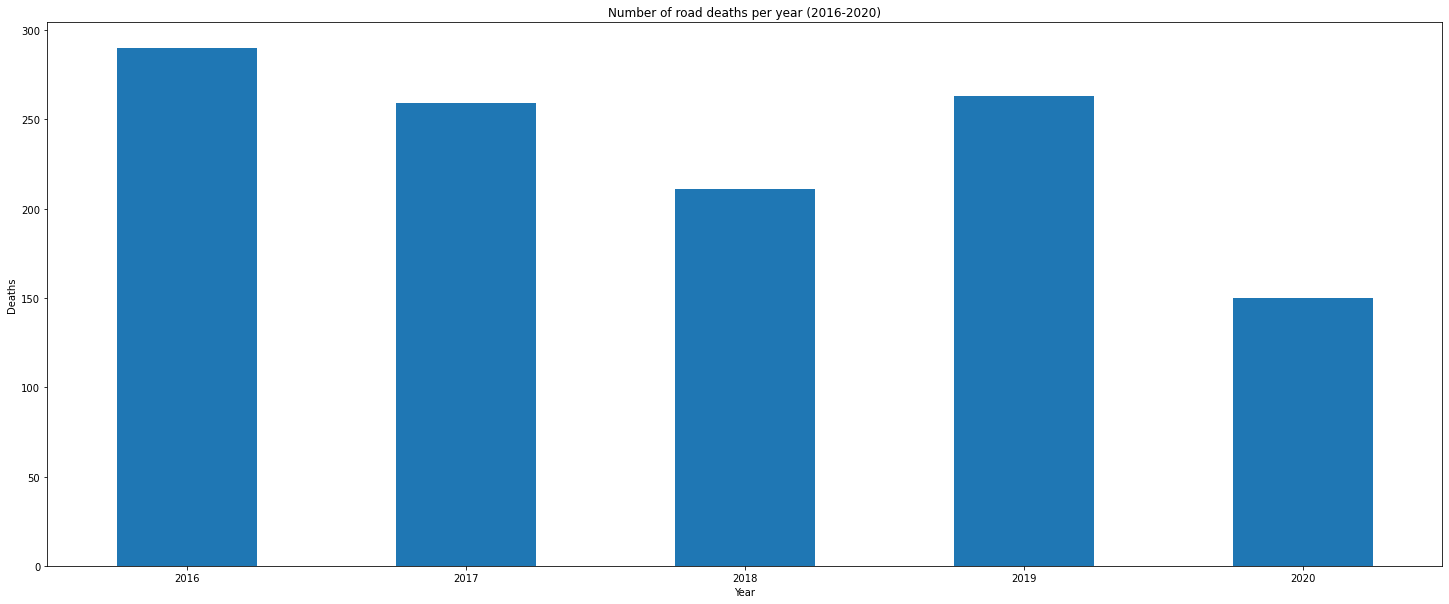

In [23]:
plt.figure(figsize=(25, 10))
sum_df_years["Deaths"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of road deaths per year (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Deaths")

plt.savefig("project_output/deaths_per_year.png")

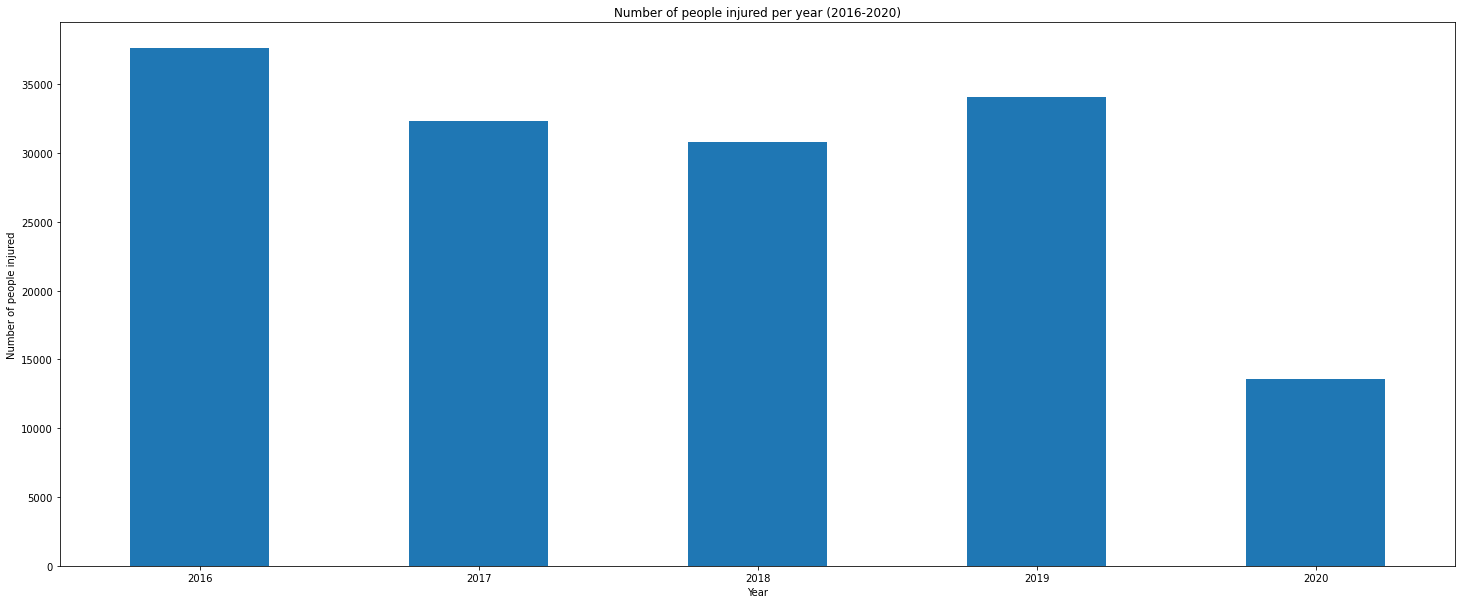

In [33]:
plt.figure(figsize=(25, 10))
sum_df_years["Persons"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of people injured per year (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of people injured")

plt.savefig("project_output/injuries_per_year.png")

# for every accident, how many people are injured

(2.0, 2.5)

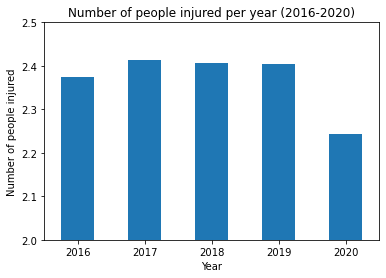

In [142]:
plt.figure(figsize=(25, 10))
sum_df_years["mean_people_injured"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Average  (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of people injured")
plt.ylim(2,2.5)

plt.savefig("project_output/injuries_per_year.png")

# for every accident, how many people die?



Text(0, 0.5, 'Number of people injured')

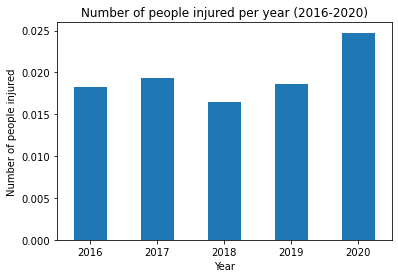

In [145]:
sum_df_years["mean_people_death"].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of people injured per year (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Number of people injured")


# 2016 - 2020 accidents per month


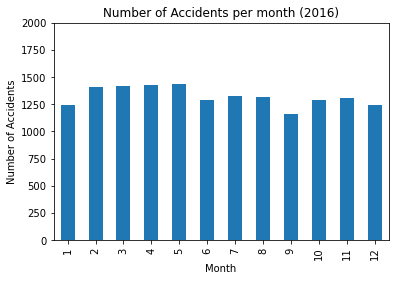

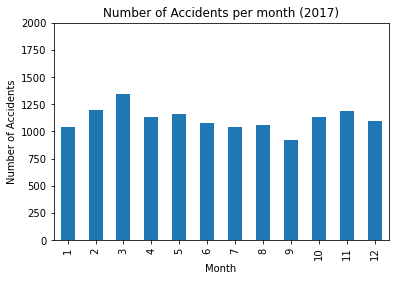

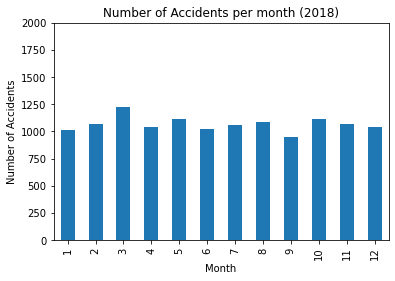

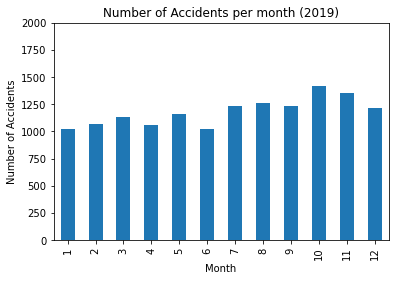

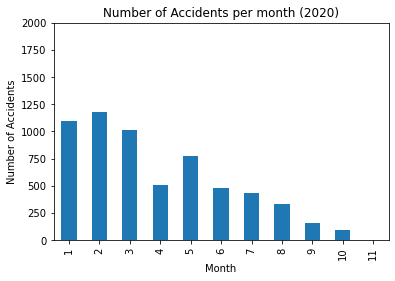

In [183]:
#months 


sum_df_months = pd.DataFrame()
sum_df_months["Number_of_accidents"] = main_accident_df.groupby([main_accident_df["ACCIDENTDATE"].dt.year,main_accident_df["ACCIDENTDATE"].dt.month], as_index=True)["ACCIDENT_NO"].count()
sum_df_months["Number_of_deaths"] = main_accident_df.groupby([main_accident_df["ACCIDENTDATE"].dt.year,main_accident_df["ACCIDENTDATE"].dt.month], as_index=True)["NO_PERSONS_KILLED"].sum()


plt.xticks(rotation=0, horizontalalignment="center")


plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,2000)

sum_df_months["Number_of_accidents"][2016].plot(kind="bar")
plt.title("Number of Accidents per month (2016)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,2000)
plt.show()

sum_df_months["Number_of_accidents"][2017].plot(kind="bar")
plt.title("Number of Accidents per month (2017)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,2000)
plt.show()

sum_df_months["Number_of_accidents"][2018].plot(kind="bar")
plt.title("Number of Accidents per month (2018)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,2000)
plt.show()

sum_df_months["Number_of_accidents"][2019].plot(kind="bar")
plt.title("Number of Accidents per month (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,2000)
plt.show()

sum_df_months["Number_of_accidents"][2020].plot(kind="bar")
plt.title("Number of Accidents per month (2020)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,2000)
plt.show()





# 2016 - 2020 people killed per month


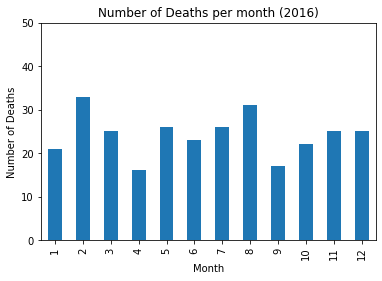

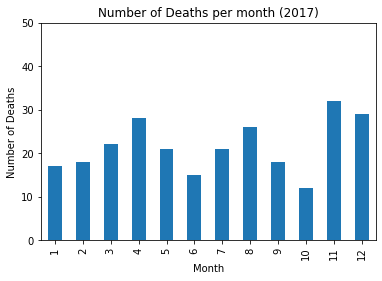

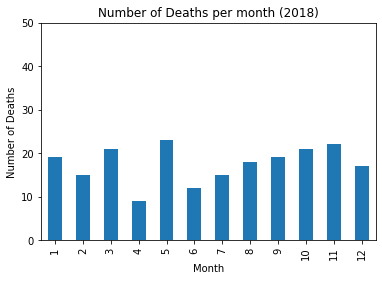

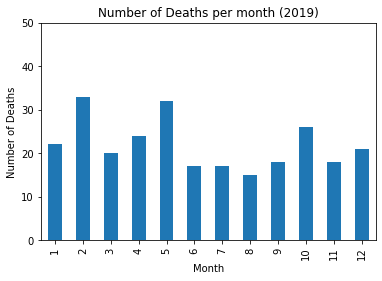

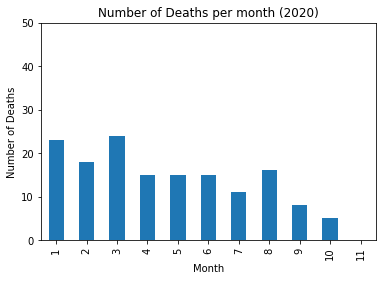

In [179]:

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.ylim(0,50)

sum_df_months["Number_of_deaths"][2016].plot(kind="bar")
plt.title("Number of Deaths per month (2016)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,50)
plt.show()

sum_df_months["Number_of_deaths"][2017].plot(kind="bar")
plt.title("Number of Deaths per month (2017)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,50)
plt.show()

sum_df_months["Number_of_deaths"][2018].plot(kind="bar")
plt.title("Number of Deaths per month (2018)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,50)
plt.show()

sum_df_months["Number_of_deaths"][2019].plot(kind="bar")
plt.title("Number of Deaths per month (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,50)
plt.show()

sum_df_months["Number_of_deaths"][2020].plot(kind="bar")
plt.title("Number of Deaths per month (2020)")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.ylim(0,50)
plt.show()



